# 深度卷积神经网络（AlexNet）

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size =11, stride = 4, padding = 1), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(96, 256, kernel_size = 5, padding = 2), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(256, 384, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p = 0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p = 0.5),
    nn.Linear(4096, 10))

### 我们构造一个单通道数据，来观察每一层输出的形状

In [9]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

### Fashion-MINIST图像的分辨率低于ImageNet图像。我们将他们增加到224x224

In [11]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(
    batch_size, resize = 224)

### 训练AlexNet

loss 0.326, train acc 0.881, test acc 0.885
1655.8 examples/sec on cuda:0


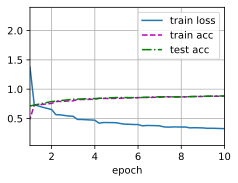

In [12]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())